**Import Library and Read CSV**

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# **Data Exploration**

## Read Data Process

In [153]:
# drive path of dataset

drivePath = "../dataset/raw/Student_dataset.csv";

In [154]:
# read dataset

df = pd.read_csv(drivePath);

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17.0,5,171.0,1,1,122.0,1,19.0,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15.0,1,9254.0,1,1,160.0,1,1.0,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1.0,5,9070.0,1,1,122.0,1,37.0,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17.0,2,9773.0,1,1,122.0,1,38.0,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39.0,1,8014.0,0,1,100.0,1,37.0,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Checking data type 

### Show all dataset of data type

In [155]:
df.dtypes

Marital status                                      int64
Application mode                                  float64
Application order                                   int64
Course                                            float64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                            float64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                         float64
Educational special needs                           int64
Debtor                                            float64
Tuition fees up to date                             int64
Gender        

### Show row and attribute types

In [156]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (4446, 37)
List of attributes:  Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Cu

None

### Removing \t in the attribute name

In [157]:
df.columns = df.columns.str.replace('\t', '', regex=True)

df.dtypes


Marital status                                      int64
Application mode                                  float64
Application order                                   int64
Course                                            float64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                            float64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                         float64
Educational special needs                           int64
Debtor                                            float64
Tuition fees up to date                             int64
Gender        

### Describe Numerical Type Data

In [158]:
#exploring basic distribution of numerical data
df.select_dtypes(['int64','float64']).describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4446.000000,4444.000000,4446.00000,4440.000000,4446.000000,4446.000000,4439.000000,4446.000000,4443.000000,4446.000000,...,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,1.179037,18.663816,1.72717,8858.807432,0.891138,4.585245,132.640572,1.896986,19.552104,22.284300,...,0.137427,0.543860,6.234818,8.065902,4.438147,10.241403,0.150022,11.572380,1.227823,-0.000684
std,0.606208,17.490937,1.31343,2060.398841,0.311501,10.224512,13.221879,7.075343,15.610384,15.345329,...,0.689473,1.921926,2.194935,3.941864,3.012180,5.200845,0.752190,2.664197,1.383290,2.269432
min,1.000000,1.000000,0.00000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.00000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.00000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.00000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.00000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Describe Object Type Data 

In [159]:
#exploring categotical data
df.select_dtypes(['object']).describe()

,Target
count,4446
unique,3
top,Graduate
freq,2221


### Show Unique Data for Object Type Data

In [160]:
#check values of each categorical attribute
cat_attributes = df.select_dtypes(['object']).columns
for i in cat_attributes:
  values = df[i].unique().tolist()
  print(i,': ',values)

Target :  ['Dropout', 'Graduate', 'Enrolled']


## Check unique values for each attribute

In [161]:
for i in df:
  values = df[i].unique().tolist()
  print(i,': ',values)

Marital status :  [1, 2, 4, 3, 5, 6]
Application mode :  [17.0, 15.0, 1.0, 39.0, 18.0, 53.0, 44.0, 51.0, 43.0, 7.0, 42.0, 16.0, 5.0, nan, 2.0, 10.0, 57.0, 26.0, 27.0]
Application order :  [5, 1, 2, 4, 3, 6, 9, 0]
Course :  [171.0, 9254.0, 9070.0, 9773.0, 8014.0, 9991.0, 9500.0, 9238.0, 9670.0, 9853.0, 9085.0, 9130.0, 9556.0, 9147.0, 9003.0, 33.0, 9119.0, nan]
Daytime/evening attendance :  [1, 0]
Previous qualification :  [1, 19, 42, 39, 10, 3, 40, 2, 4, 12, 43, 15, 6, 9, 38, 5, 14]
Previous qualification (grade) :  [122.0, 160.0, 100.0, 133.1, 142.0, 119.0, 137.0, 138.0, 139.0, 136.0, 133.0, 110.0, 149.0, 127.0, 135.0, 140.0, 125.0, 126.0, 151.0, 115.0, 150.0, 143.0, 130.0, 120.0, 103.0, 154.0, 132.0, 167.0, 129.0, 141.0, 116.0, 148.0, 118.0, 106.0, 121.0, 114.0, 124.0, 123.0, 113.0, 111.0, 131.0, 158.0, 146.0, 117.0, 153.0, 178.0, 99.0, 134.0, 128.0, 170.0, 155.0, 145.0, 152.0, 112.0, 107.0, 156.0, 188.0, 96.0, 161.0, 166.0, 147.0, 144.0, nan, 102.0, 101.0, 180.0, 172.0, 105.0, 108.0,

## Count of Missing and duplicate valeu

In [162]:
missing_values = df.isnull().sum()
duplicate_count = df.duplicated().sum()

print('Missing value Count Before Count: ', missing_values)
print('Duplicate Count Before Count: ', duplicate_count)

Missing value Count Before Count:  Marital status                                     0
Application mode                                   2
Application order                                  0
Course                                             6
Daytime/evening attendance                         0
Previous qualification                             0
Previous qualification (grade)                     7
Nacionality                                        0
Mother's qualification                             3
Father's qualification                             0
Mother's occupation                                0
Father's occupation                                0
Admission grade                                   18
Displaced                                          3
Educational special needs                          0
Debtor                                             2
Tuition fees up to date                            0
Gender                                             0
Scholarship

## Visualization of the data 

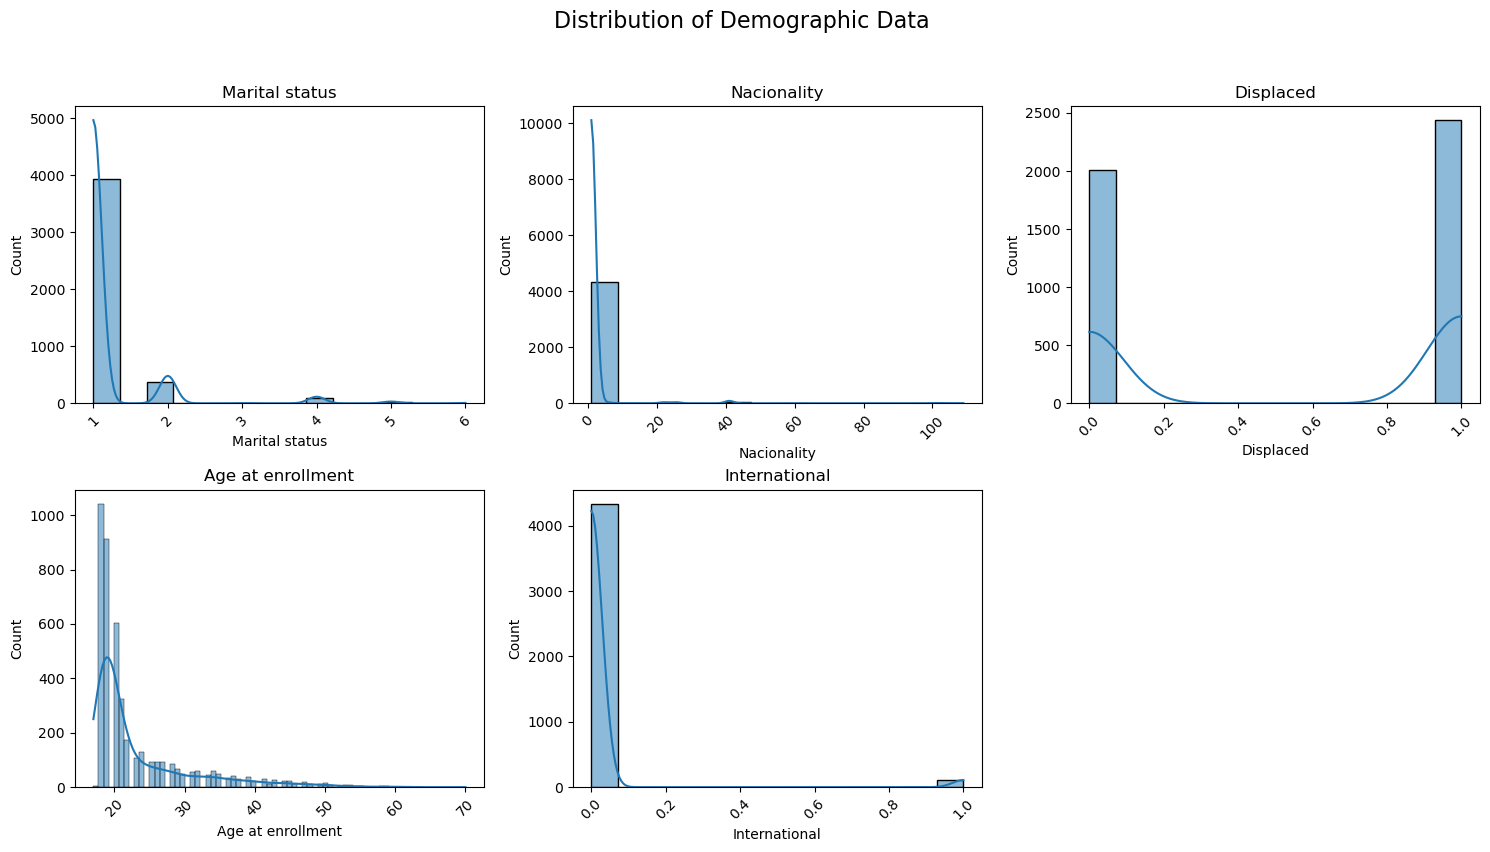

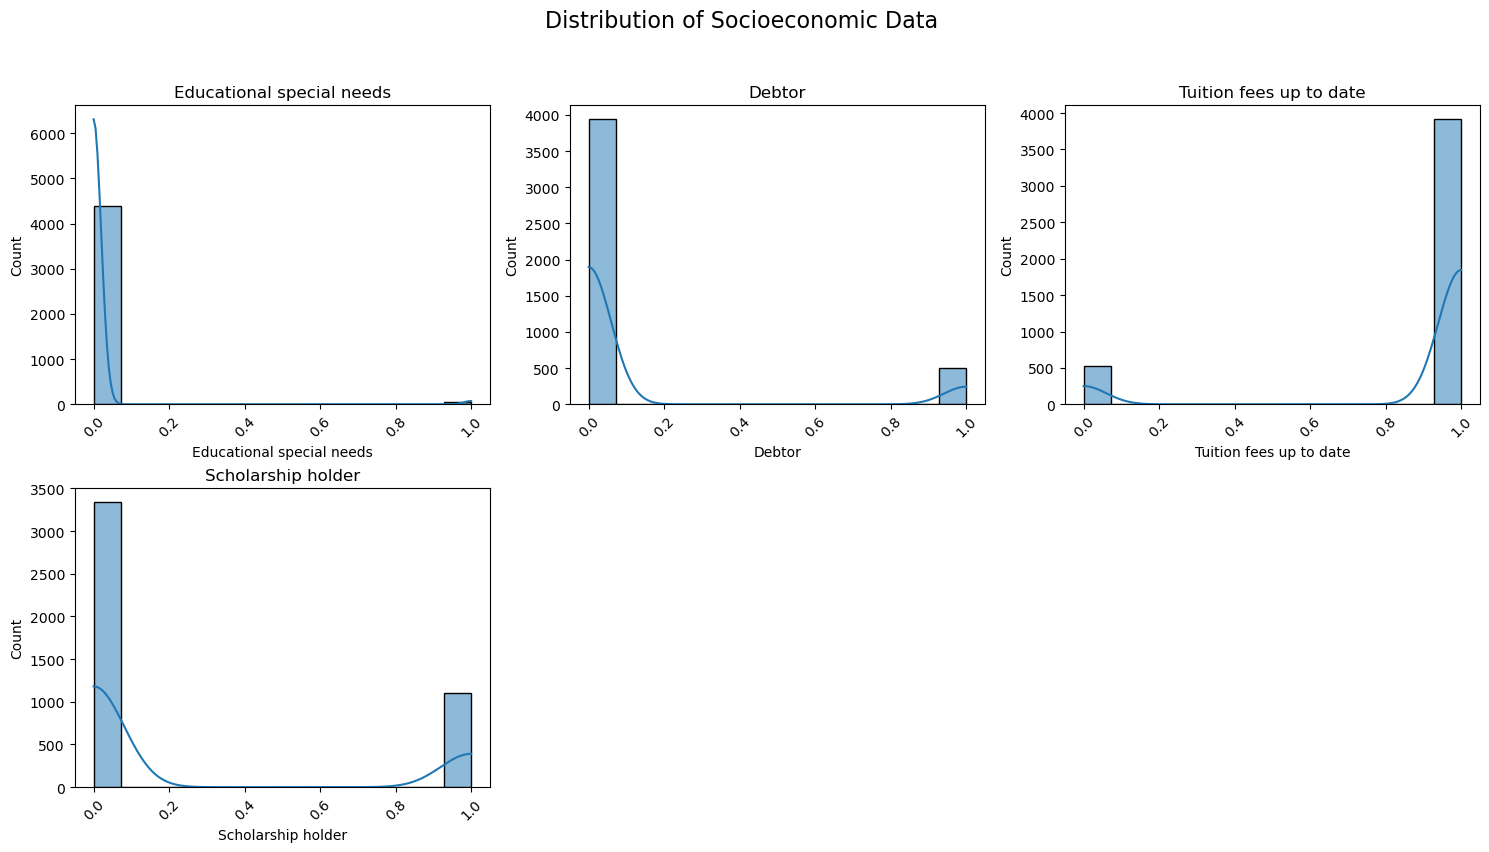

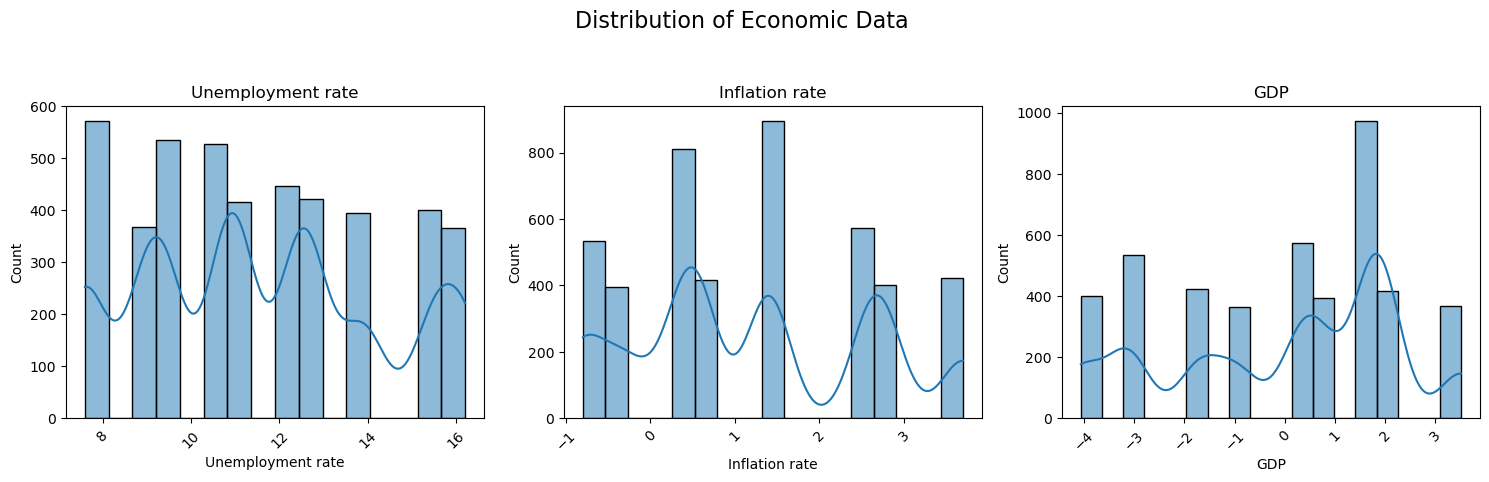

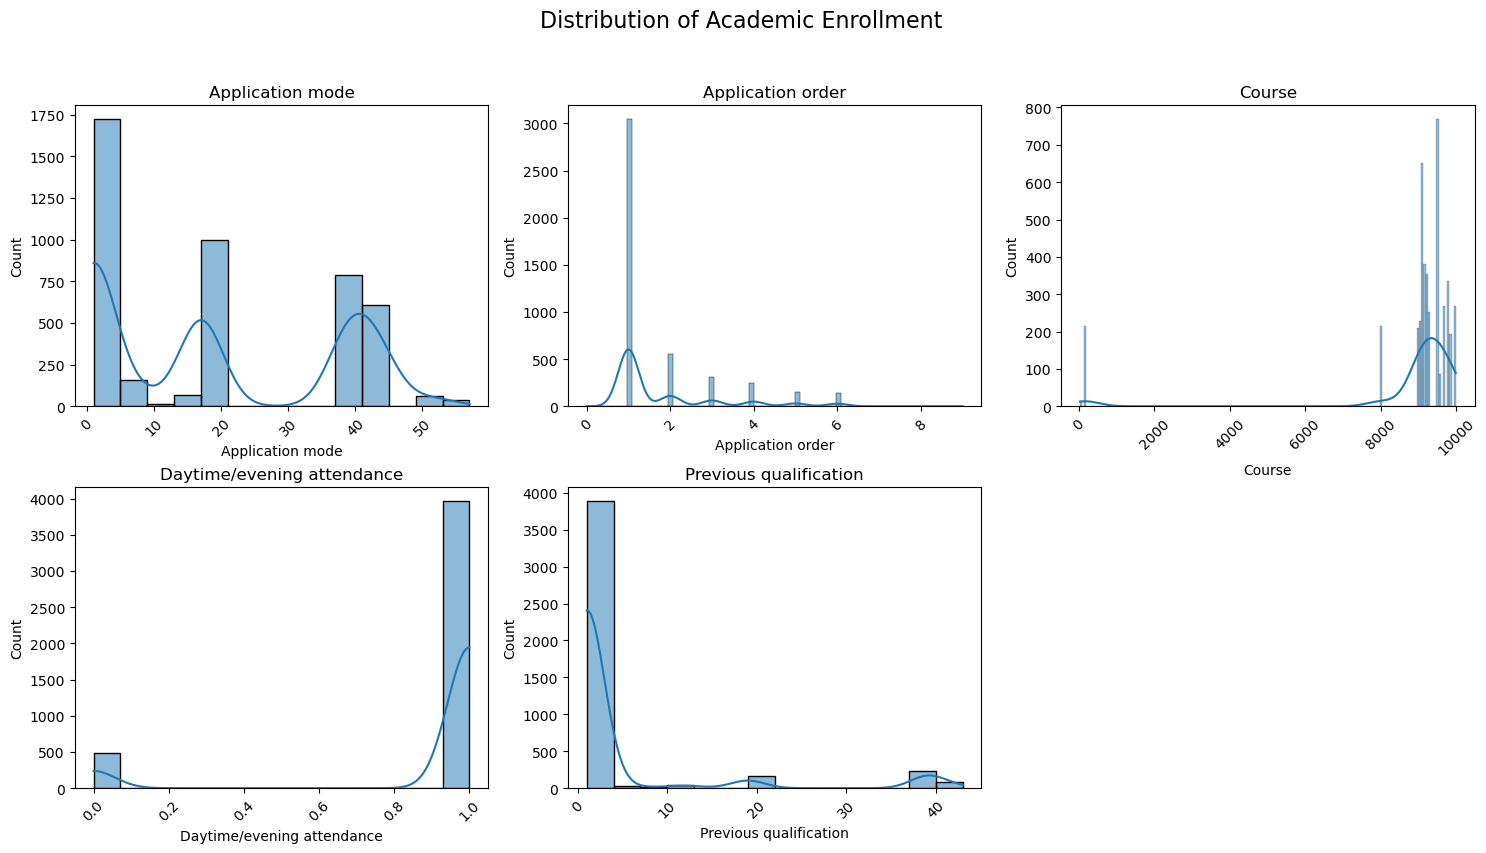

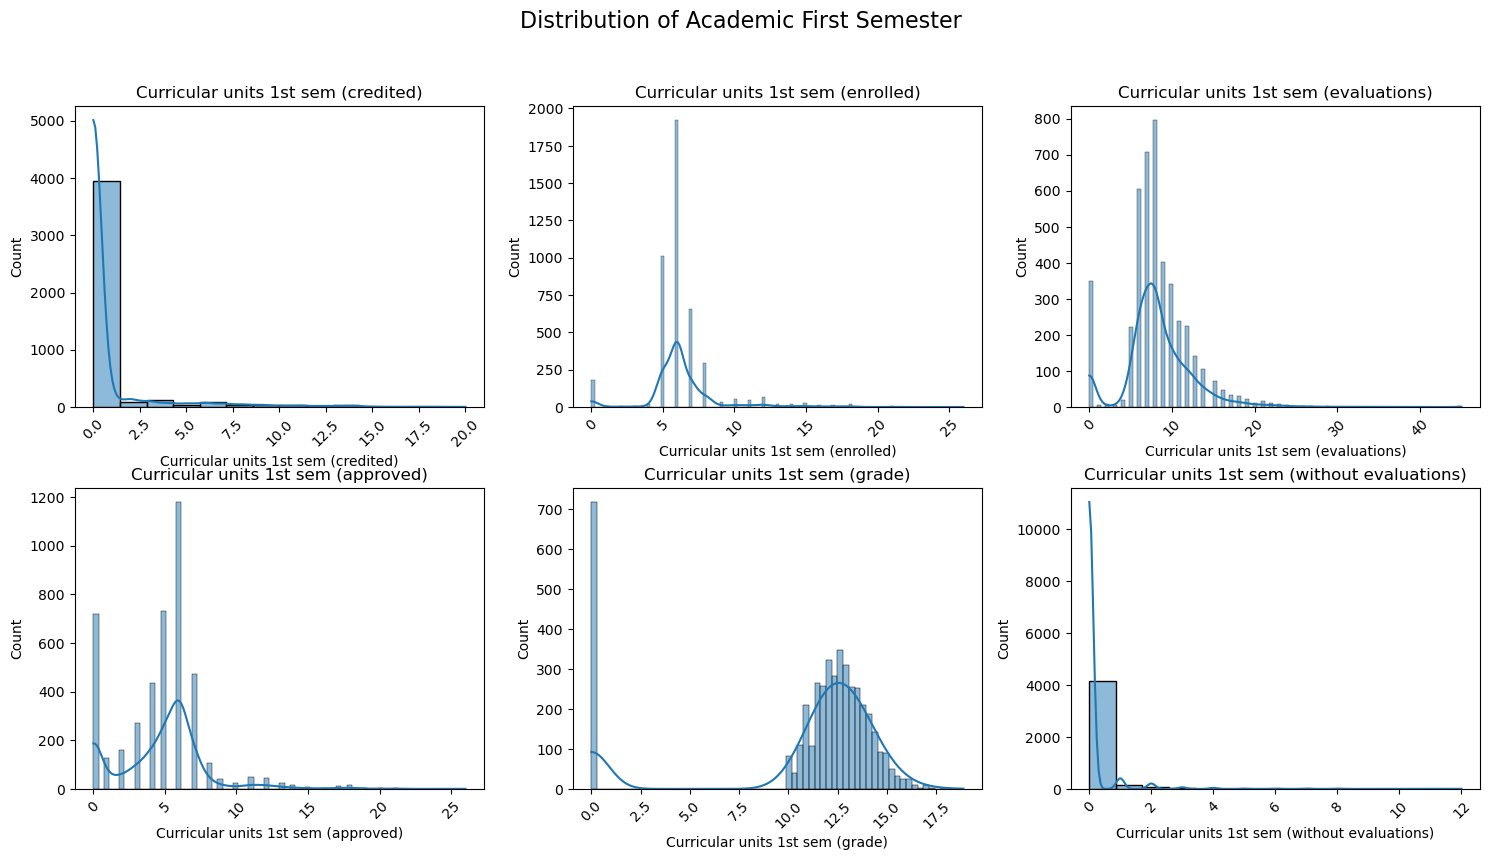

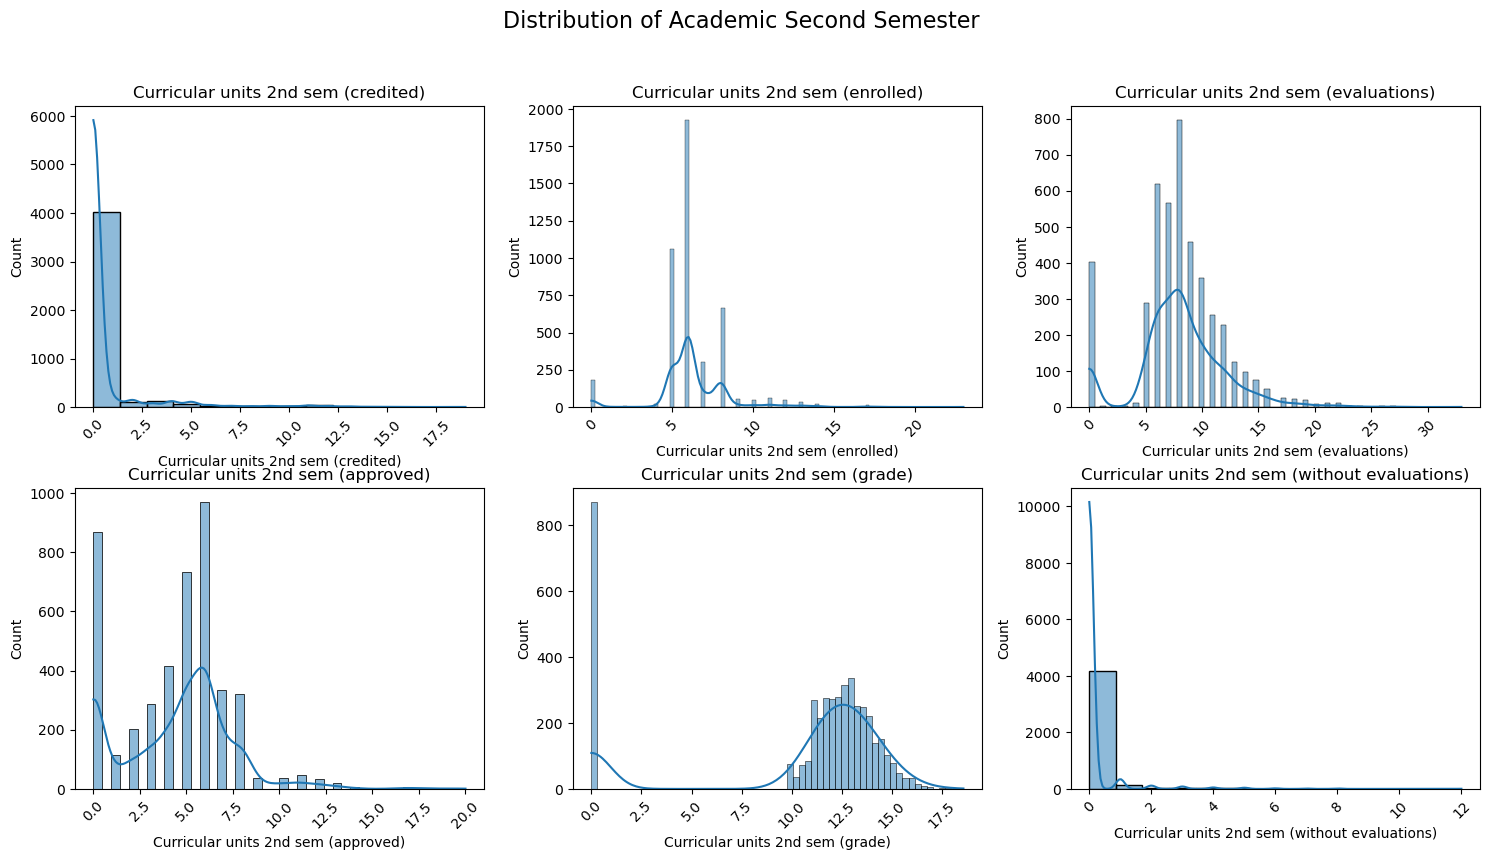

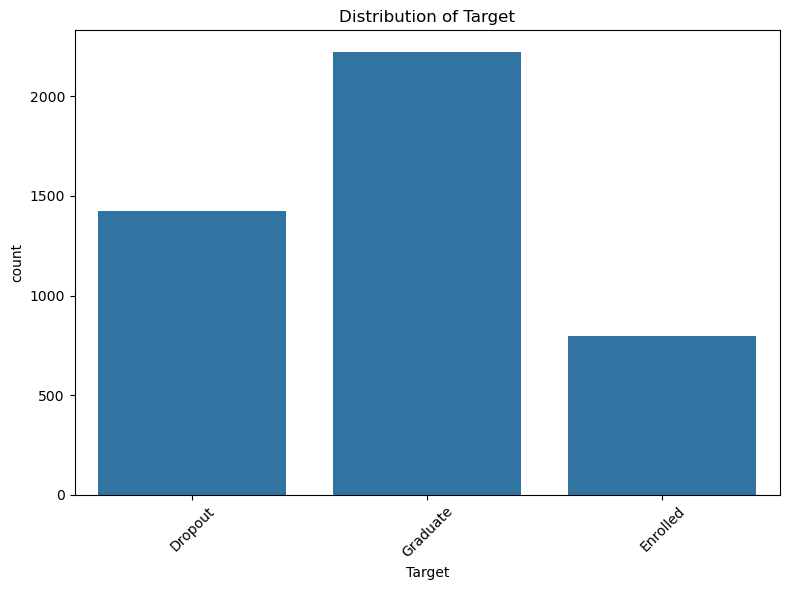

In [163]:
demographic_data = ["Marital status","Nacionality","Displaced","Age at enrollment","International"]
socioeconomics_data = [
    "Father’s qualification",
    "Mother’s qualification",
    "Father’s occupation",
    "Mother’s occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder"
]
economic_data = ["Unemployment rate","Inflation rate","GDP"]
academic_enrollment = ["Application mode","Application order","Course","Daytime/evening attendance","Previous qualification"]
academic_first_sem = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)"
]

academic_second_sem = [
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)"
]

target = ["Target"]

categories = {
    "Demographic Data": demographic_data,
    "Socioeconomic Data": socioeconomics_data,
    "Economic Data": economic_data,
    "Academic Enrollment": academic_enrollment,
    "Academic First Semester": academic_first_sem,
    "Academic Second Semester": academic_second_sem,
}


def plot_distribution(df, categories):
    for category, columns in categories.items():
        # Filter valid columns
        valid_columns = [col for col in columns if col in df.columns]
        
        # Determine the number of figures needed (9 plots per figure)
        num_columns = len(valid_columns)
        num_figures = (num_columns // 9) + (1 if num_columns % 9 != 0 else 0)
        
        # Create figures for each batch of 9 plots
        for fig_num in range(num_figures):
            plt.figure(figsize=(15, 12))
            start_idx = fig_num * 9
            end_idx = start_idx + 9
            cols_to_plot = valid_columns[start_idx:end_idx]

            for i, col in enumerate(cols_to_plot):
                plt.subplot(3, 3, i + 1)
                if df[col].dtype == 'object':
                    sns.countplot(x=col, data=df)
                else:
                    sns.histplot(df[col], kde=True)
                plt.title(col)
                plt.xticks(rotation=45)

            plt.tight_layout()
            plt.suptitle(f"Distribution of {category} ", fontsize=16)
            plt.subplots_adjust(top=0.9)
            plt.show()

# Call the function
plot_distribution(df, categories)

target = ["Target"]

# Create a plot specifically for the target variable
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Check if the column exists and plot accordingly

if df[target[0]].dtype == 'object':
    sns.countplot(x=target[0], data=df)
else:
    sns.histplot(df[target[0]], kde=True)
plt.title(f"Distribution of {target[0]}")
plt.xticks(rotation=45)


plt.tight_layout()

### Create a Distribution Plot for each numerical column

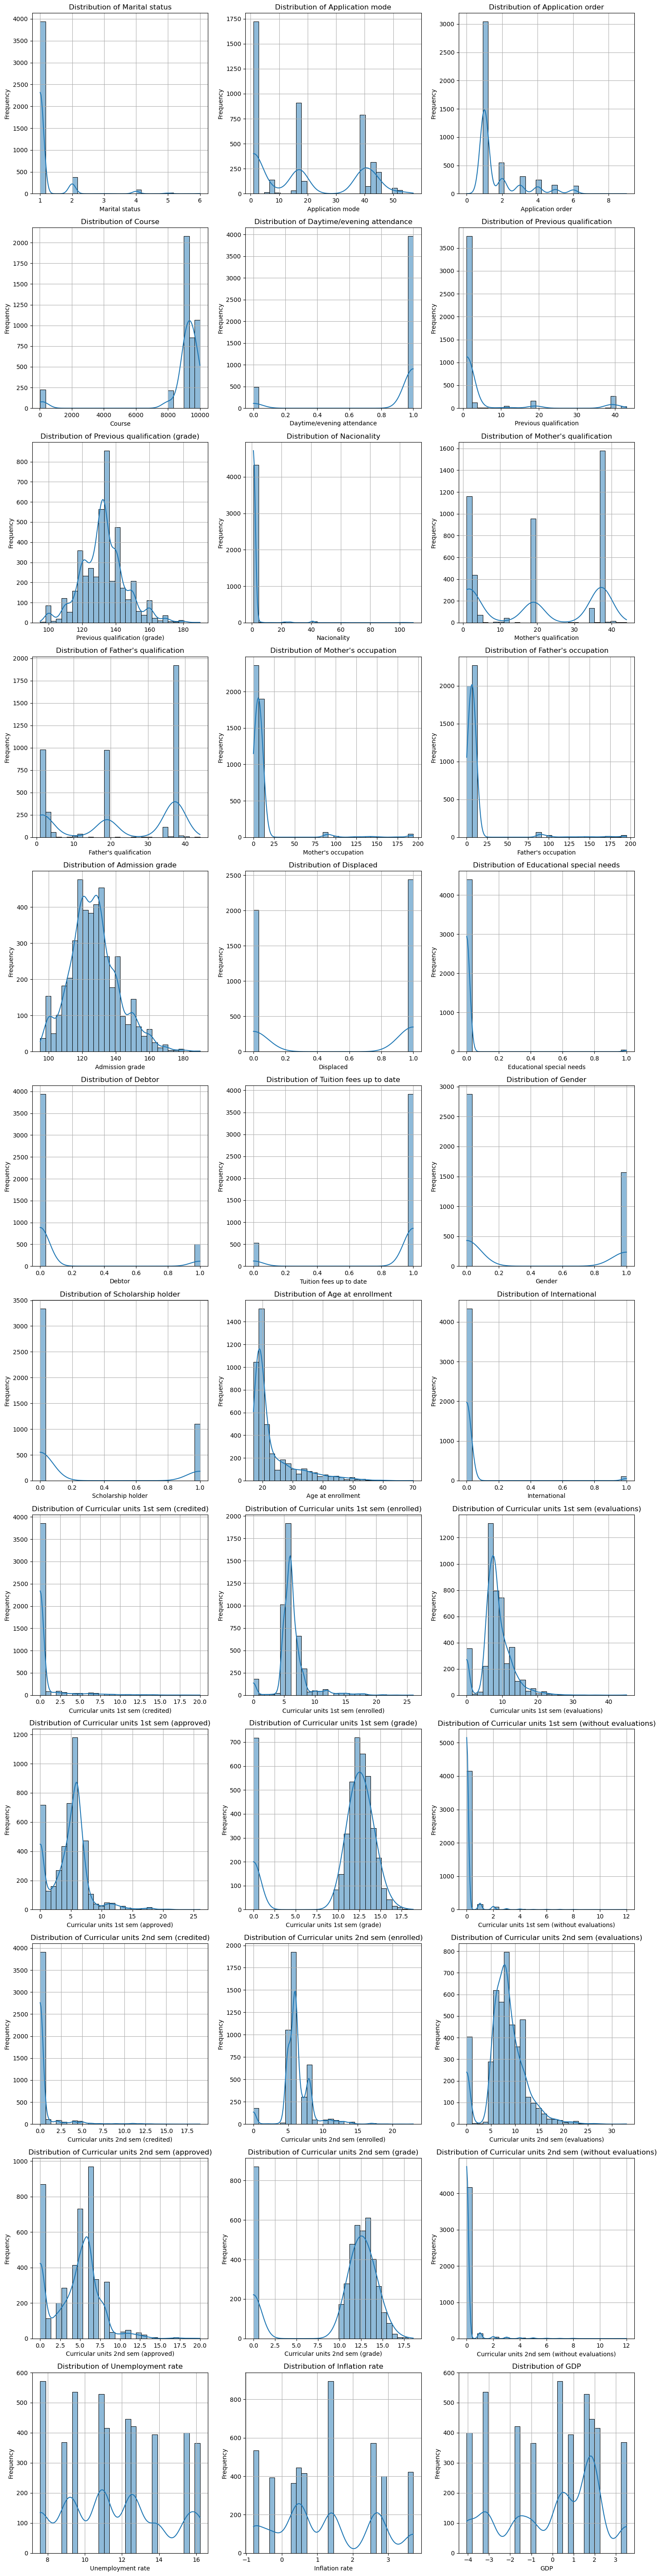

In [164]:
# Step 1: Identify numerical columns
numerical_columns = df.select_dtypes(['int64', 'float64']).columns

# Step 2: Create a single figure with subplots for each numerical column
num_columns = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_columns // 3) + (num_columns % 3 > 0), ncols=3, figsize=(15, 5 * ((num_columns // 3) + (num_columns % 3 > 0))))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a distribution plot for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])  # Use the corresponding subplot axis
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Count Plot for Target Variables

,Target,Frequency
0,Graduate,2221
1,Dropout,1427
2,Enrolled,798


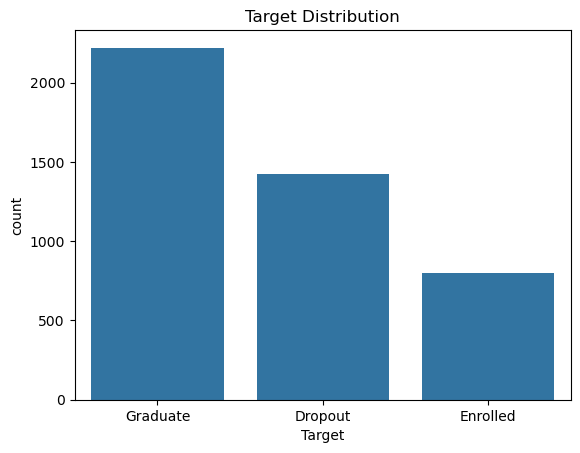

In [165]:
target_df = df.copy()

target_count = target_df['Target'].value_counts().reset_index()

target_count.columns = ['Target', 'Frequency']

# Display the frequency table
display(target_count)

# Optional: To display the frequency table as a sorted table (if not already sorted by frequency)
target_count = target_count.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Create a countplot with sorted order (if you still want to display the plot)
target_order = target_count['Target'].tolist()
sns.countplot(x='Target', data=df, order=target_order)
plt.title('Target Distribution')
plt.show()


### Dispaly the correlation matrix as a heatmap

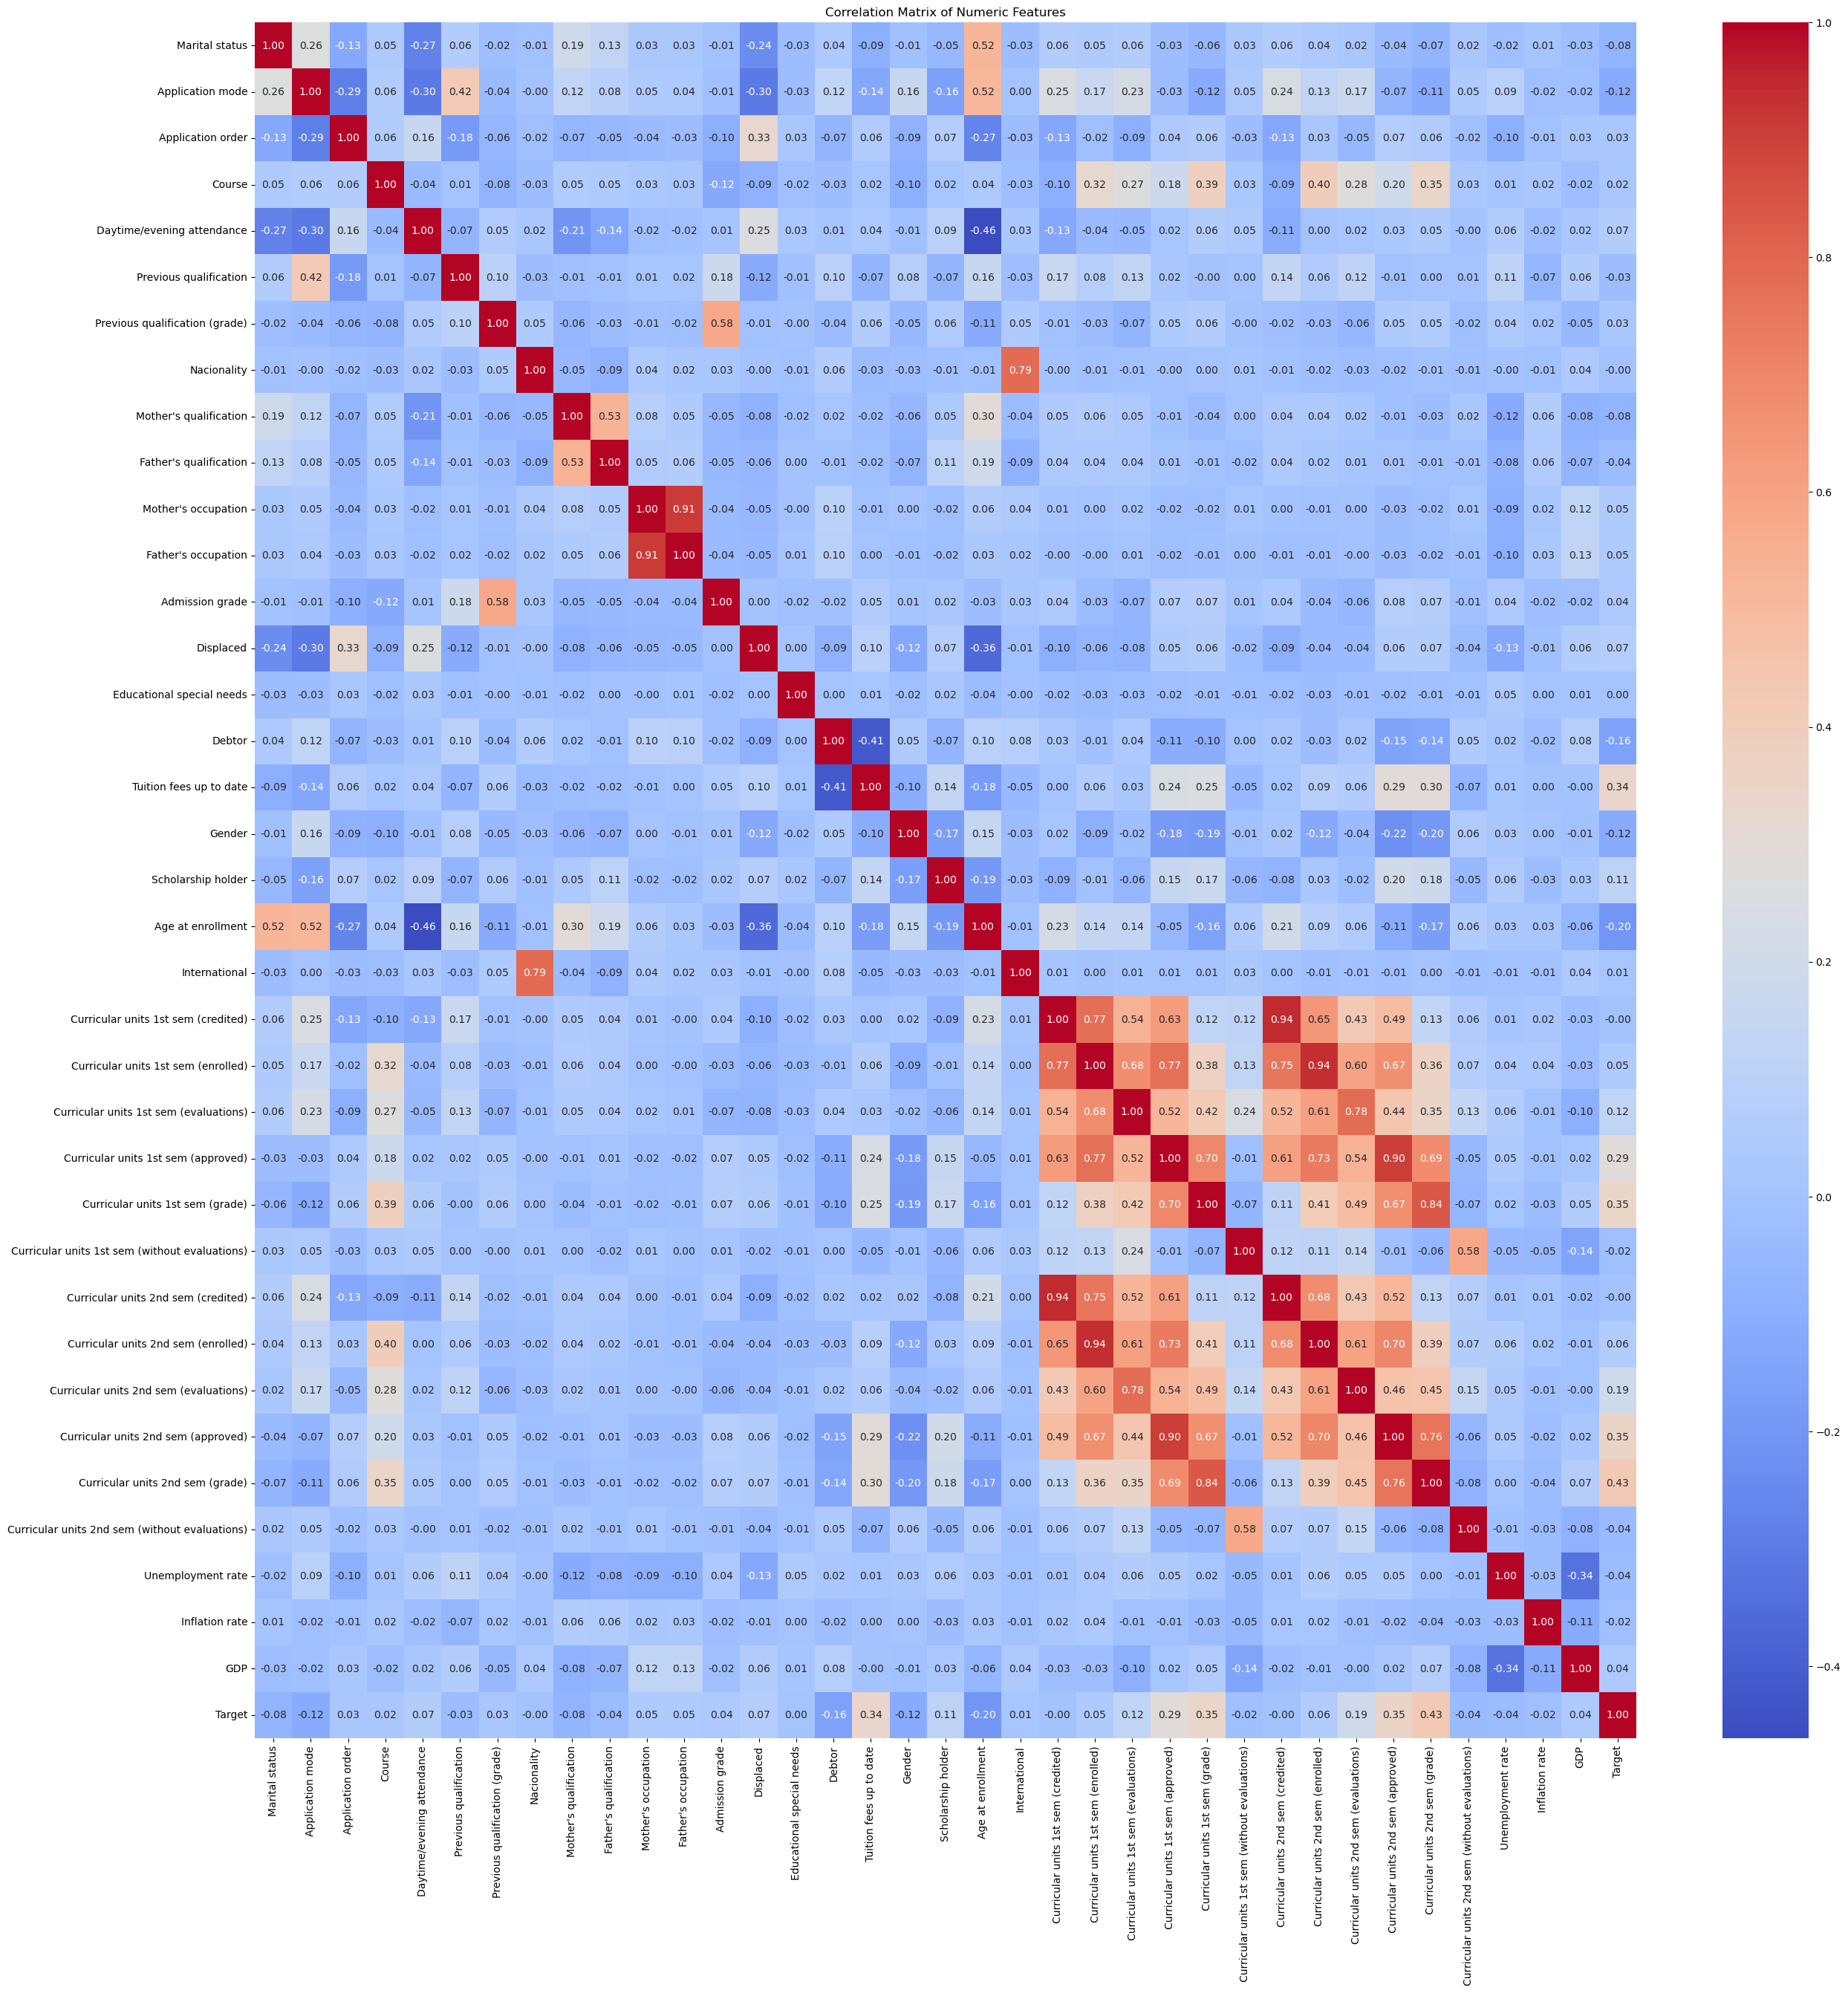

In [166]:
dfCopy = df.copy()
dfCopy['Target'] = dfCopy['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

# Select only numeric columns for correlation analysis
numeric_df = dfCopy.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(30, 30))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# **Formulating exploratory question**

In [167]:
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17.0,5,171.0,1,1,122.0,1,19.0,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15.0,1,9254.0,1,1,160.0,1,1.0,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1.0,5,9070.0,1,1,122.0,1,37.0,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


### **Question 1:** Is there a significant difference in the distribution of 2nd semester grades among students who dropped out, graduated, or are still enrolled?

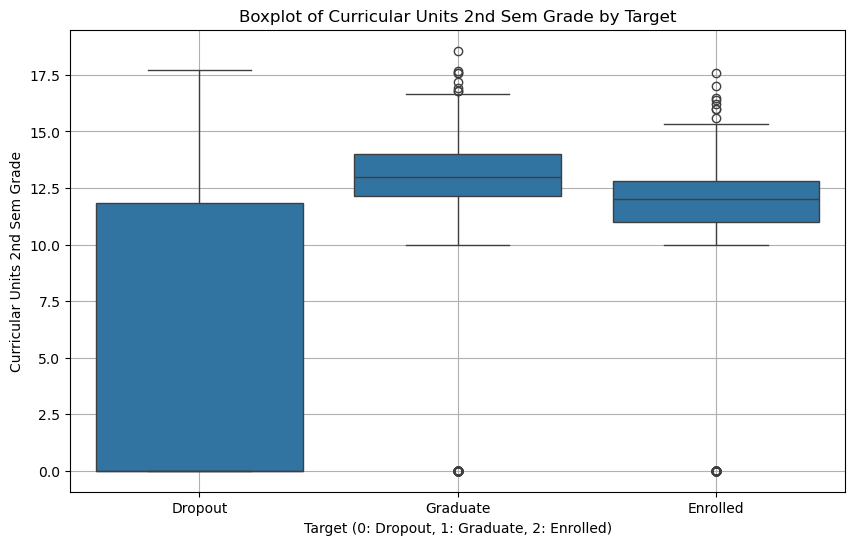

Contingency Table:


Target,Dropout,Enrolled,Graduate
Curricular units 2nd sem (grade),,,
0.000000,727,68,75
10.000000,48,26,3
10.166667,2,1,1
10.200000,1,2,1
10.250000,4,5,1
...,...,...,...
17.587500,0,0,1
17.600000,0,1,1
17.692308,0,0,1



Chi-Square Test Results:
Chi-Square Statistic: 2918.18
Degrees of Freedom: 1562
P-Value: 0.0000

Expected Frequencies Table:


Target,Dropout,Enrolled,Graduate
Curricular units 2nd sem (grade),,,
0.000000,279.237517,156.153846,434.608637
10.000000,24.714125,13.820513,38.465362
10.166667,1.283851,0.717949,1.998201
10.200000,1.283851,0.717949,1.998201
10.250000,3.209627,1.794872,4.995502
...,...,...,...
17.587500,0.320963,0.179487,0.499550
17.600000,0.641925,0.358974,0.999100
17.692308,0.320963,0.179487,0.499550



Conclusion: There is a significant relationship between grade category and student outcomes.


In [168]:
contingency_table = pd.crosstab(df['Curricular units 2nd sem (grade)'], df['Target'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Curricular units 2nd sem (grade)', data=df)
plt.title('Boxplot of Curricular Units 2nd Sem Grade by Target')
plt.xlabel('Target (0: Dropout, 1: Graduate, 2: Enrolled)')
plt.ylabel('Curricular Units 2nd Sem Grade')
plt.grid()
plt.show()

print("Contingency Table:")
display(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

print("\nExpected Frequencies Table:")
display(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

alpha = 0.05  # Significance level
if p < alpha:
    print("\nConclusion: There is a significant relationship between grade category and student outcomes.")
else:
    print("\nConclusion: There is no significant relationship between grade category and student outcomes.")

### **Question 2:** Is marital status will be influence whether a student graduates, drops out, or remains enrolled?

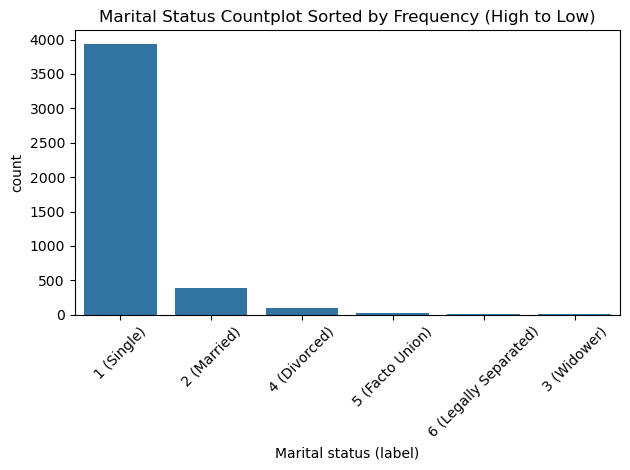

Contingency Table:


Target,Dropout,Enrolled,Graduate
Marital status (label),,,
1 (Single),1187,724,2026
2 (Married),181,52,149
3 (Widower),1,2,1
4 (Divorced),43,16,33
5 (Facto Union),11,3,11
6 (Legally Separated),4,1,1



Chi-Square Test Results:
Chi-Square Statistic: 65.85034773216609
Degrees of Freedom: 10
P-Value: 2.786155846036901e-10

Expected Frequencies Table:


Target,Dropout,Enrolled,Graduate
Marital status (label),,,
1 (Single),1263.630004,706.641026,1966.728970
2 (Married),122.607737,68.564103,190.828160
3 (Widower),1.283851,0.717949,1.998201
4 (Divorced),29.528565,16.512821,45.958614
5 (Facto Union),8.024067,4.487179,12.488754
6 (Legally Separated),1.925776,1.076923,2.997301



Conclusion: There is a significant relationship between marital status and student outcomes.


In [169]:
# Example DataFrame - Ensure your actual DataFrame is loaded
# Assuming the columns are "Marital status" and "Target"
marital_status_mapping = {
    1: '1 (Single)',
    2: '2 (Married)',
    3: '3 (Widower)',
    4: '4 (Divorced)',
    5: '5 (Facto Union)',
    6: '6 (Legally Separated)'
}

marital_table = df.copy()


# Map numerical marital status to categorical labels
marital_table['Marital status (label)'] = marital_table['Marital status'].map(marital_status_mapping)

# Sorting marital status by frequency for countplot
marital_status_order = marital_table['Marital status (label)'].value_counts().index

# Countplot sorted by frequency (high to low)
sns.countplot(x='Marital status (label)', data=marital_table, order=marital_status_order)
plt.title('Marital Status Countplot Sorted by Frequency (High to Low)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a contingency table
contingency_table = pd.crosstab(marital_table['Marital status (label)'], marital_table['Target'])

print("Contingency Table:")
display(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display Chi-Square Test Results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p}")

# Display Expected Frequencies
print("\nExpected Frequencies Table:")
display(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpretation
alpha = 0.05
if p < alpha:
    print("\nConclusion: There is a significant relationship between marital status and student outcomes.")
else:
    print("\nConclusion: There is no significant relationship between marital status and student outcomes.")


### **Question 3:** Do scholarship holders have different graduation or dropout rates compared to non-scholarship holders?

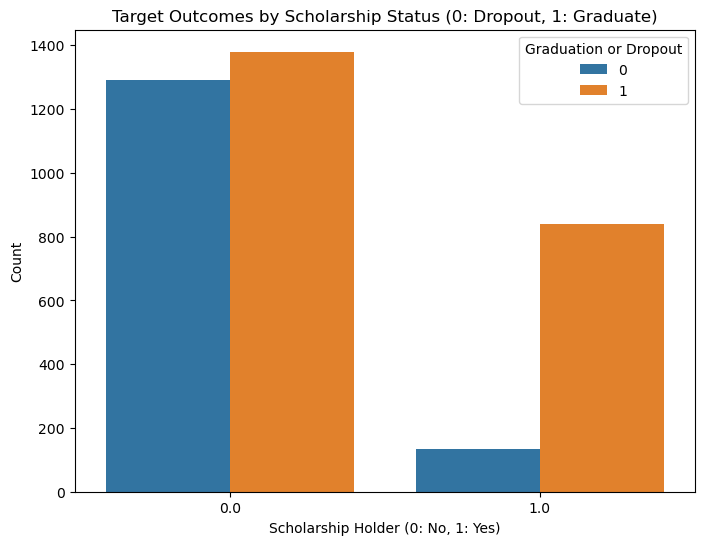

   Scholarship holder  Graduation or Dropout    percent
0                 0.0                      1  51.646707
1                 0.0                      0  48.353293
2                 1.0                      1  86.139630
3                 1.0                      0  13.860370
Chi-squared statistic: 355.0791060001552
P-value: 3.3198213762616617e-79
There is a statistically significant association between scholarship status and graduation/dropout.


In [170]:
# Step 3: Exploratory Data Analysis (EDA)
df_3 = df.copy()

# Remove rows with 'Enrolled' status
df_3 = df_3[df_3['Target'] != 'Enrolled']

# Convert 'Target' to binary (1 for Graduate, 0 for dropout)
df_3['Graduation or Dropout'] = df_3['Target'].apply(lambda x: 1 if x == 'Graduate' else 0)

plt.figure(figsize=(8, 6))
sns.countplot(x='Scholarship holder', hue='Graduation or Dropout', data=df_3)
plt.title('Target Outcomes by Scholarship Status (0: Dropout, 1: Graduate)')
plt.xlabel('Scholarship Holder (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Calculate the count and proportion of graduation/dropout by scholarship status
scholarship_counts = df_3.groupby('Scholarship holder')['Graduation or Dropout'].value_counts()
scholarship_proportions = df_3.groupby('Scholarship holder')['Graduation or Dropout'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
print(scholarship_proportions)

# Perform Chi-square test
contingency_table = pd.crosstab(df_3['Scholarship holder'], df_3['Graduation or Dropout'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
alpha = 0.05
if p <= alpha:
    print("There is a statistically significant association between scholarship status and graduation/dropout.")
else:
    print("There is no statistically significant association between scholarship status and graduation/dropout.")


### Question 4: Is there any relationship between being a debtor and the likelihood of graduating?

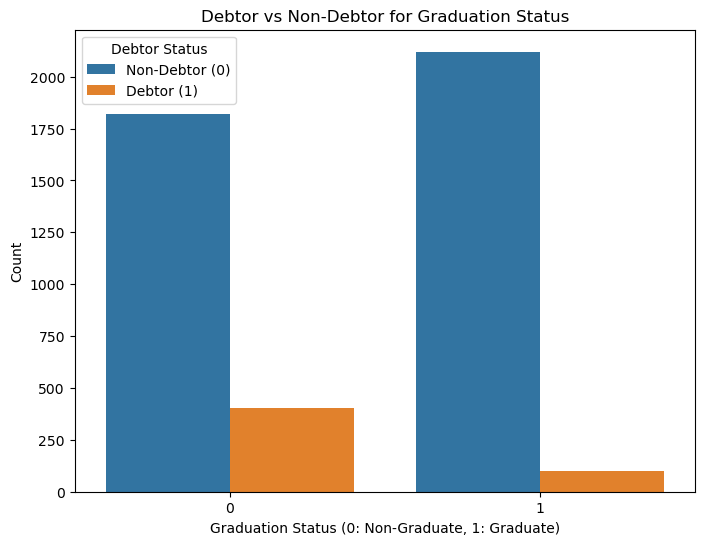

Chi-Square statistic: 203.4495600048105, p-value: 3.690557855001625e-46
There is a significant relationship between Debtor status and graduation status.
This suggests that being a debtor may influence the likelihood of graduating.


In [171]:
df_4 = df.copy()

# Convert 'Target' to binary (1 for Graduate, 0 for non-Graduate)
df_4['Graduate'] = df_4['Target'].apply(lambda x: 1 if x == 'Graduate' else 0)

# Countplot for Debtor vs Non-Debtor and Graduation Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Graduate', hue='Debtor', data=df_4)
plt.title("Debtor vs Non-Debtor for Graduation Status")
plt.xlabel("Graduation Status (0: Non-Graduate, 1: Graduate)")
plt.ylabel("Count")
plt.legend(title="Debtor Status", labels=["Non-Debtor (0)", "Debtor (1)"])
plt.show()
# Create contingency table for Debtor vs Graduate status
contingency_table = pd.crosstab(df_4['Debtor'], df_4['Graduate'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the Chi-Square result
print(f"Chi-Square statistic: {chi2_stat}, p-value: {p_val}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("There is a significant relationship between Debtor status and graduation status.")
    print("This suggests that being a debtor may influence the likelihood of graduating.")
else:
    print("There is no significant relationship between Debtor status and graduation status.")
    print("This suggests that being a debtor does not significantly influence the likelihood of graduating.")

# **Data Preprocessing**

### Check unique values for each attribute

In [172]:
for i in df:
  values = df[i].unique().tolist()
  print(i,': ',values)

Marital status :  [1, 2, 4, 3, 5, 6]
Application mode :  [17.0, 15.0, 1.0, 39.0, 18.0, 53.0, 44.0, 51.0, 43.0, 7.0, 42.0, 16.0, 5.0, nan, 2.0, 10.0, 57.0, 26.0, 27.0]
Application order :  [5, 1, 2, 4, 3, 6, 9, 0]
Course :  [171.0, 9254.0, 9070.0, 9773.0, 8014.0, 9991.0, 9500.0, 9238.0, 9670.0, 9853.0, 9085.0, 9130.0, 9556.0, 9147.0, 9003.0, 33.0, 9119.0, nan]
Daytime/evening attendance :  [1, 0]
Previous qualification :  [1, 19, 42, 39, 10, 3, 40, 2, 4, 12, 43, 15, 6, 9, 38, 5, 14]
Previous qualification (grade) :  [122.0, 160.0, 100.0, 133.1, 142.0, 119.0, 137.0, 138.0, 139.0, 136.0, 133.0, 110.0, 149.0, 127.0, 135.0, 140.0, 125.0, 126.0, 151.0, 115.0, 150.0, 143.0, 130.0, 120.0, 103.0, 154.0, 132.0, 167.0, 129.0, 141.0, 116.0, 148.0, 118.0, 106.0, 121.0, 114.0, 124.0, 123.0, 113.0, 111.0, 131.0, 158.0, 146.0, 117.0, 153.0, 178.0, 99.0, 134.0, 128.0, 170.0, 155.0, 145.0, 152.0, 112.0, 107.0, 156.0, 188.0, 96.0, 161.0, 166.0, 147.0, 144.0, nan, 102.0, 101.0, 180.0, 172.0, 105.0, 108.0,

### Change data type to category

In [173]:
df['Target'] = df['Target'].astype('category')

### Check data type

In [174]:
df.dtypes

Marital status                                       int64
Application mode                                   float64
Application order                                    int64
Course                                             float64
Daytime/evening attendance                           int64
Previous qualification                               int64
Previous qualification (grade)                     float64
Nacionality                                          int64
Mother's qualification                             float64
Father's qualification                               int64
Mother's occupation                                  int64
Father's occupation                                  int64
Admission grade                                    float64
Displaced                                          float64
Educational special needs                            int64
Debtor                                             float64
Tuition fees up to date                              int

### Clean Missing Data And Duplicate Data

In [175]:
cleaned_data = df.drop_duplicates().dropna()

missing_values_after_cleaning = cleaned_data.isnull().sum()
duplicate_count_after_cleaning = cleaned_data.duplicated().sum()

display(missing_values_after_cleaning)
print('Duplicate Count After Cleaning: ', duplicate_count_after_cleaning)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Duplicate Count After Cleaning:  0


### Normalize the numerical data

In [176]:
numeric_data = cleaned_data.select_dtypes(include='number')
scaler = StandardScaler()
cleaned_data[numeric_data.columns] = scaler.fit_transform(numeric_data)

In [177]:
display(cleaned_data)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.293661,-0.094473,2.488505,-4.214974,0.350547,-0.348587,-0.803796,-0.126985,-0.038605,-0.669944,...,-0.282435,-2.838854,-2.040348,-1.470253,-1.963161,-0.201335,-0.286352,0.123178,0.765213,Dropout
1,-0.293661,-0.208939,-0.553793,0.192195,0.350547,-0.348587,2.082863,-0.126985,-1.193323,-1.256675,...,-0.282435,-0.105736,-0.522226,0.520558,0.660517,-0.201335,0.877958,-1.106268,0.346302,Graduate
2,-0.293661,-1.010200,2.488505,0.102916,0.350547,-0.348587,-0.803796,-0.126985,1.116113,0.959862,...,-0.282435,-0.105736,-2.040348,-1.470253,-1.963161,-0.201335,-0.286352,0.123178,0.765213,Dropout
3,-0.293661,-0.094473,0.206782,0.444019,0.350547,-0.348587,-0.803796,-0.126985,1.180264,0.959862,...,-0.282435,-0.105736,0.489855,0.188756,0.417346,-0.201335,-0.812169,-1.467870,-1.377846,Graduate
4,1.367003,1.164651,-0.553793,-0.409467,-2.852681,-0.348587,-2.475019,-0.126985,1.116113,1.025054,...,-0.282435,-0.105736,-0.522226,0.520558,0.532532,-0.201335,0.877958,-1.106268,0.346302,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.293661,-1.010200,3.249079,0.444019,0.350547,-0.348587,-0.575902,-0.126985,-1.193323,-1.387059,...,-0.282435,-0.105736,-0.016186,0.188756,0.468540,-0.201335,1.478892,1.135662,-1.792347,Graduate
4420,-0.293661,-1.010200,0.206782,0.444019,0.350547,-0.348587,-0.955725,14.836704,-1.193323,-1.387059,...,-0.282435,-0.105736,-0.522226,-0.806649,0.148579,-0.201335,-0.173676,-0.455385,0.888681,Dropout
4421,-0.293661,-1.010200,-0.553793,0.311556,0.350547,-0.348587,1.627075,-0.126985,1.116113,0.959862,...,-0.282435,0.805303,0.236834,-1.138451,0.628520,-0.201335,0.877958,-1.106268,0.346302,Dropout
4422,-0.293661,-1.010200,-0.553793,0.140277,0.350547,-0.348587,3.602157,-0.126985,1.116113,0.959862,...,-0.282435,-0.561256,-0.522226,0.188756,0.340556,-0.201335,-0.812169,-1.467870,-1.377846,Graduate


### Preprocessing of Classification

In [178]:
label_encoder = LabelEncoder()
cleaned_data['Target'] = label_encoder.fit_transform(cleaned_data['Target'])

# Step 1: Preprocess the data
# Select features and target variable
X = cleaned_data.drop(columns=['Target'])  # Features
y = cleaned_data['Target']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### To know how many set in training and testing

In [179]:
print('Training set: ', y_train.shape)
print('Testing set: ', y_test.shape)

Training set:  (5229,)
Testing set:  (876,)


# **Classfication**

## K-fold Cross-Validation and show heat map function

In [180]:
def perform_cross_validation(classifier, X_train, y_train, k=10,model_name=""):

    # Set up scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }
    
    # Perform cross-validation
    cv_results = cross_validate(
        classifier,
        X_train,
        y_train,
        cv=k,
        scoring=scoring,
        return_train_score=True
    )
    
    # Print classification metrics
    print(f"\nCross-Validation Results for {model_name}:")
    print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f}")
    print(f"Precision: {cv_results['test_precision'].mean():.4f}")
    print(f"Recall: {cv_results['test_recall'].mean():.4f}")
    print(f"F1 Score: {cv_results['test_f1'].mean():.4f}")


    classifier_pred = classifier.predict(X_test)

    # Step 4: Confusion matrix
    classifier_conf_mat = confusion_matrix(y_test, classifier_pred, normalize='true')

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(classifier_conf_mat, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['Dropout', 'Graduate', 'Enrolled'],
                yticklabels=['Dropout', 'Graduate', 'Enrolled'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return cv_results

## Classification Model

### **Logistic Regression**


Cross-Validation Results for Logistic Regression:
Accuracy: 0.7376
Precision: 0.7425
Recall: 0.7376
F1 Score: 0.7377


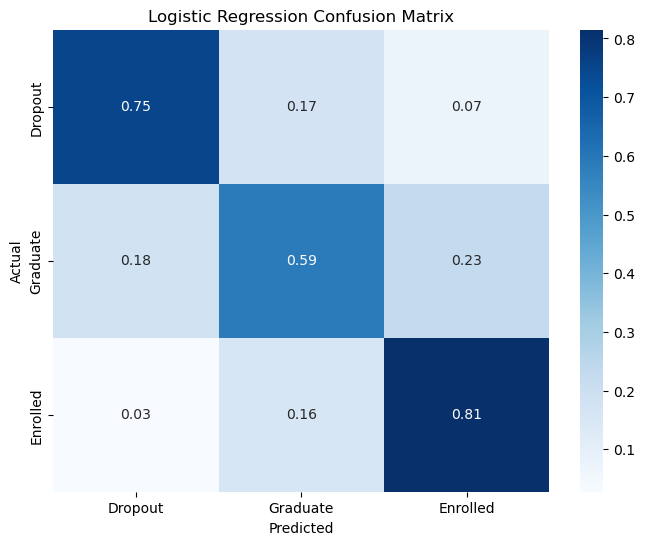

In [181]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Set a higher max_iter to ensure convergence
log_reg = log_reg.fit(X_train, y_train)

cv_results_logreg = perform_cross_validation(log_reg, X_train, y_train, model_name="Logistic Regression")

### **Decision Tree**

In [182]:
def validate_decision_tree_criteria(X_train, y_train, X_test, y_test, criteria=["gini", "entropy", "log_loss"], max_depth=5):
  
    results = []
    best_model = None
    best_accuracy = -float('inf')

    for criterion in criteria:
        print(f"Evaluating criterion: {criterion}")

        # Initialize the classifier with the current criterion
        dt_classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)

        # Train the model
        dt_classifier.fit(X_train, y_train)

        # Evaluate on the test set
        train_accuracy = dt_classifier.score(X_train, y_train)
        test_accuracy = dt_classifier.score(X_test, y_test)

        # Store the results
        results.append({
            "Criterion": criterion,
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy
        })

        # Update the best model if current model is better
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = dt_classifier

    # Convert results to DataFrame for display
    results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)

    # Display the results as a table
    print("\nModel Performance Table:")
    display(results_df)  # Use display for the DataFrame

    print(f"\nBest Criterion: {results_df.iloc[0]['Criterion']} with Test Accuracy: {results_df.iloc[0]['Test Accuracy']:.4f}\n")

    return best_model, results_df


In [183]:
dt_classifier, _ = validate_decision_tree_criteria(X_train, y_train, X_test, y_test)

Evaluating criterion: gini
Evaluating criterion: entropy
Evaluating criterion: log_loss

Model Performance Table:


,Criterion,Train Accuracy,Test Accuracy
1,entropy,0.755403,0.723744
2,log_loss,0.755403,0.723744
0,gini,0.765347,0.720320



Best Criterion: entropy with Test Accuracy: 0.7237




Cross-Validation Results for Decision Tree:
Accuracy: 0.7359
Precision: 0.7453
Recall: 0.7359
F1 Score: 0.7350


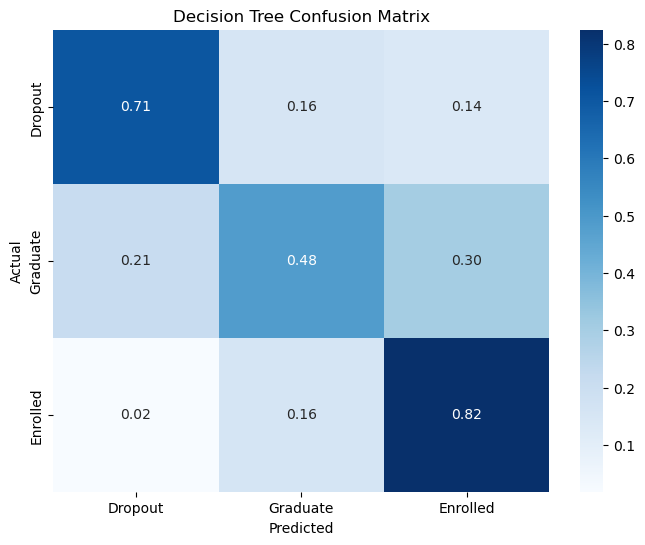

In [184]:
dt_classifier.fit(X_train, y_train)
cv_results_dt = perform_cross_validation(dt_classifier, X_train, y_train, model_name="Decision Tree")

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.696311
16                         Tuition fees up to date    0.075266
23          Curricular units 1st sem (evaluations)    0.059392
22             Curricular units 1st sem (enrolled)    0.056751
19                               Age at enrollment    0.024911
3                                           Course    0.023214
24             Curricular units 1st sem (approved)    0.012129
31                Curricular units 2nd sem (grade)    0.010879
15                                          Debtor    0.008604
33                               Unemployment rate    0.007289
12                                 Admission grade    0.006658
29          Curricular units 2nd sem (evaluations)    0.006080
6                   Previous qualification (grade)    0.004334
18                              Scholarship holder    0.004298
35                                             GDP    0

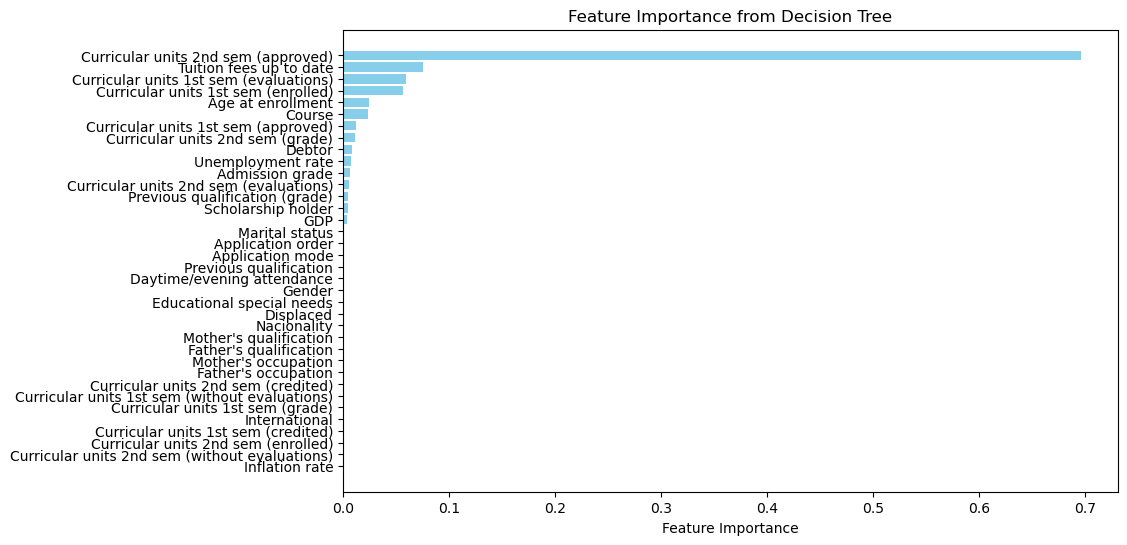

In [185]:
# Get feature importances from the trained decision tree
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by Importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the features in descending order of importance
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


### **Support Vector Machines (SVM)**


Cross-Validation Results for SVM Classifier:
Accuracy: 0.7300
Precision: 0.7374
Recall: 0.7300
F1 Score: 0.7307


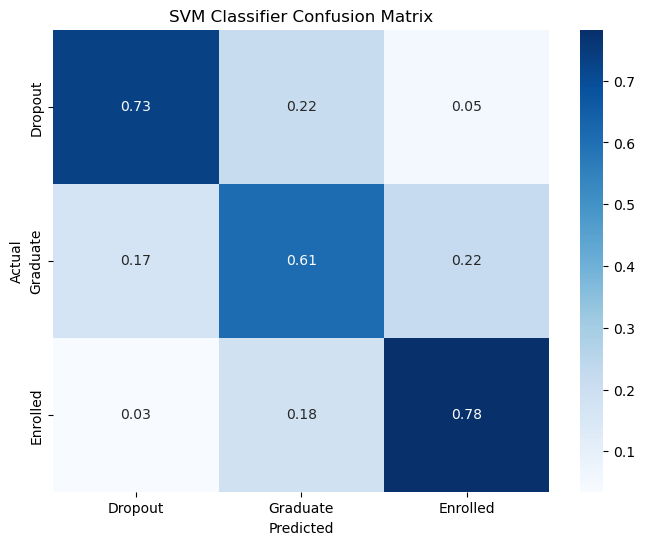

In [186]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

cv_results_svm = perform_cross_validation(svm_model, X_train, y_train, model_name="SVM Classifier")

### **K-Nearest Neighbors (KNN)**

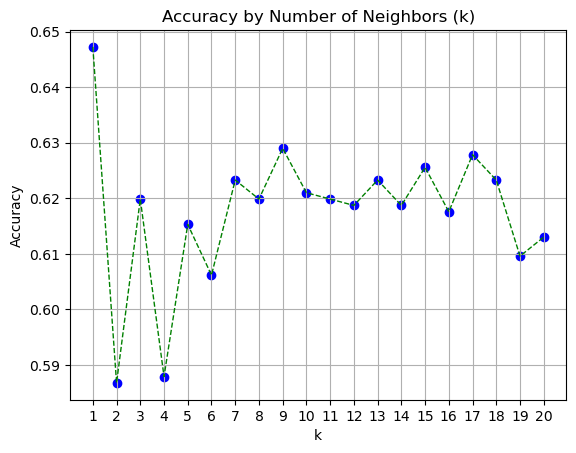

In [187]:
# Finding the best k value
k_range = range(1, 21)  # Testing k from 1 to 20
scores = []

for k in k_range:
    knn3 = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn3.fit(X_train, y_train)  # Fit on training data
    scores.append(knn3.score(X_test, y_test))  # Evaluate on test data

# Plotting the accuracy for different values of k
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Neighbors (k)')
plt.scatter(k_range, scores, color='blue')
plt.plot(k_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)
plt.xticks(k_range)
plt.grid()
plt.show()


Cross-Validation Results for K-Nearest Neighbors (KNN):
Accuracy: 0.7294
Precision: 0.7541
Recall: 0.7294
F1 Score: 0.7298


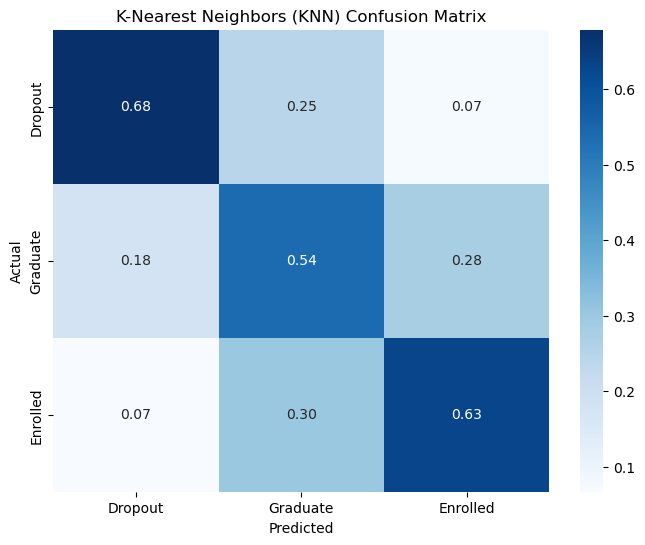

In [188]:
# Step 3: Train the KNN model
knn_num = KNeighborsClassifier(n_neighbors=9)
knn_num = knn_num.fit(X_train, y_train)

# Step 1: show cross validation results
cv_results_knn = perform_cross_validation(knn_num, X_train, y_train, model_name="K-Nearest Neighbors (KNN)")

### **Random Forest**


Cross-Validation Results for Random Forest:
Accuracy: 0.8491
Precision: 0.8580
Recall: 0.8491
F1 Score: 0.8480


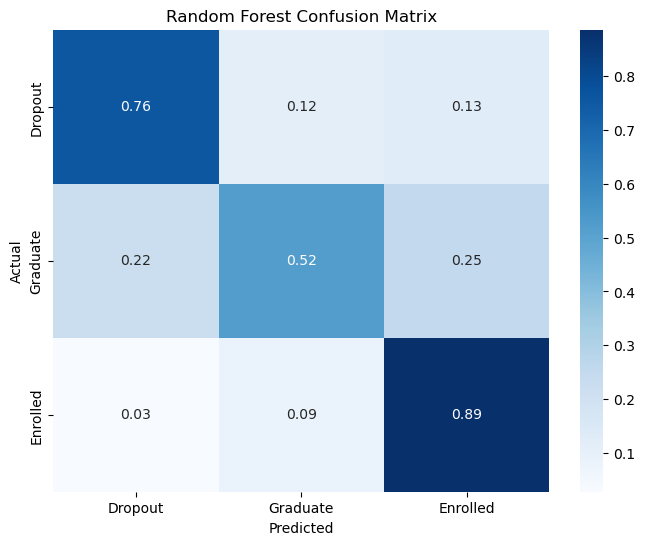

In [189]:
# Step 1: Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier = rf_classifier.fit(X_train, y_train)

cv_results_rf = perform_cross_validation(rf_classifier, X_train, y_train, model_name="Random Forest")

## **Ensemble Methods**

### Bagging Classifier


Cross-Validation Results for Bagging Method:
Accuracy: 0.8222
Precision: 0.8322
Recall: 0.8222
F1 Score: 0.8213


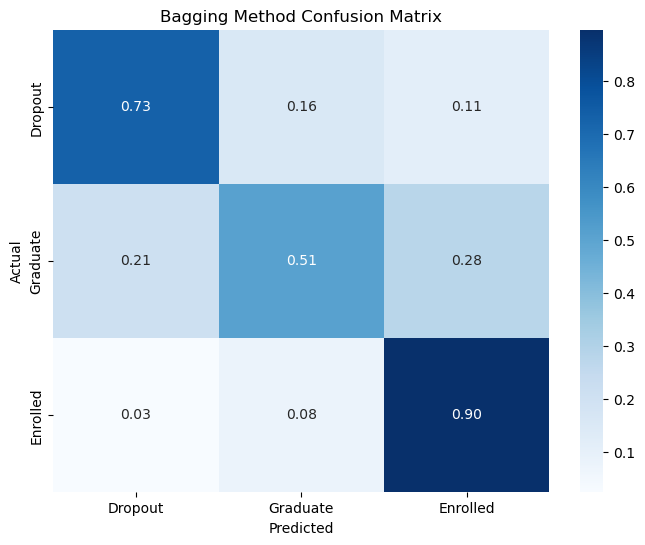

In [190]:
# Define the Bagging Classifier
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Step 3: Fit the model on the training set
bagging_clf.fit(X_train, y_train)


cv_results_bagging = perform_cross_validation(bagging_clf, X_train, y_train, model_name="Bagging Method")

### Adaboost with Logistic Regression

c:\Users\junyao\miniconda3\envs\CDS6314-ass\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\junyao\miniconda3\envs\CDS6314-ass\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\junyao\miniconda3\envs\CDS6314-ass\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\junyao\miniconda3\envs\CDS6314-ass\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\junyao\miniconda3\envs\CDS6314-ass\Lib\site


Cross-Validation Results for AdaBoost with Logistic Regression:
Accuracy: 0.6908
Precision: 0.6910
Recall: 0.6908
F1 Score: 0.6879


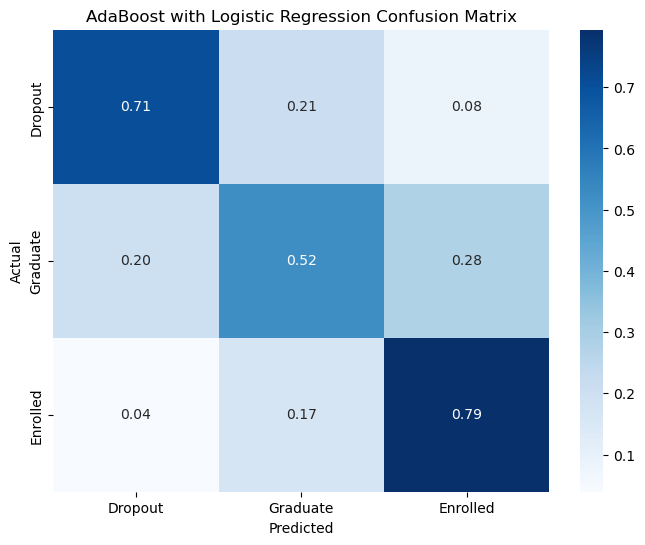

In [191]:
# AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(
    estimator = LogisticRegression(random_state=1),
    n_estimators = 100,
    algorithm = 'SAMME',
    random_state = 42
)

# Step 3: Fit the model on the training set
adaboost_clf.fit(X_train, y_train)

cv_results_adaboost = perform_cross_validation(adaboost_clf, X_train, y_train, model_name="AdaBoost with Logistic Regression")


### Histogram Gradient Booting Classifier


Cross-Validation Results for Histogram Gradient Booting Classifier:
Accuracy: 0.8545
Precision: 0.8648
Recall: 0.8545
F1 Score: 0.8533


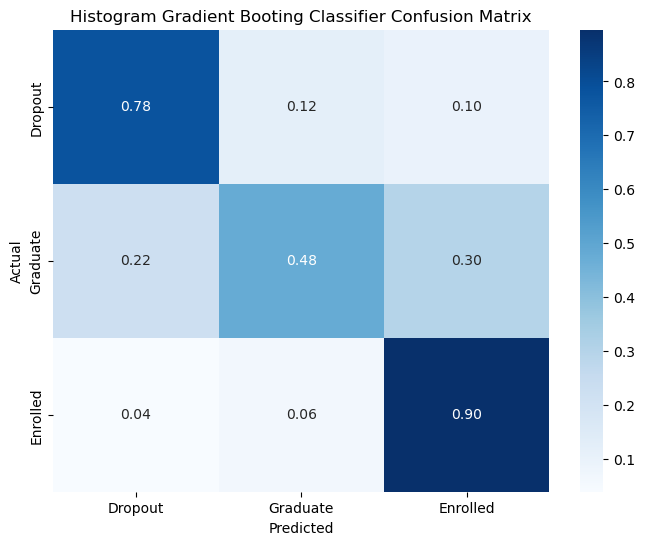

In [192]:
# Gradient Boosting Classifier
gb_clf = HistGradientBoostingClassifier()
gb_clf = gb_clf.fit(X_train, y_train)


cv_results_hg = perform_cross_validation(gb_clf, X_train, y_train, model_name="Histogram Gradient Booting Classifier")

### XGBoost Classifier

In [193]:
# # XGBoost Classifier
# xgb_clf = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
# xgb_clf = xgb_clf.fit(X_train, y_train)

# cv_results_xgb = perform_cross_validation(xgb_clf, X_train, y_train, model_name="XGBoost Classifier")


# **Performence analysis**

## **Comparison between each Classification Algorithm**

In [194]:
# Creating a dictionary (map) for storing the cross-validation results
cv_results_map = {
    'Logistic Regression': cv_results_logreg,
    'Decision Tree': cv_results_dt,
    'SVM': cv_results_svm,
    'KNN': cv_results_knn,
    'Random Forest': cv_results_rf,
    'Bagging': cv_results_bagging,
    'AdaBoost': cv_results_adaboost,
    "Histogram Gradient boosting": cv_results_hg,
    # 'XGBoost': cv_results_xgb
}

# Creating a results DataFrame using the map
results = {
    'Model': list(cv_results_map.keys()),
    'Mean Accuracy': [cv_results_map[model]['test_accuracy'].mean() for model in cv_results_map],
    'Mean Precision': [cv_results_map[model]['test_precision'].mean() for model in cv_results_map],
    'Mean Recall': [cv_results_map[model]['test_recall'].mean() for model in cv_results_map],
    'Mean F1-Score': [cv_results_map[model]['test_f1'].mean() for model in cv_results_map]
}

# Converting the map results into a DataFrame
results_df = pd.DataFrame(results)
display(results_df)


,Model,Mean Accuracy,Mean Precision,Mean Recall,Mean F1-Score
0,Logistic Regression,0.737622,0.742492,0.737622,0.737663
1,Decision Tree,0.735903,0.745319,0.735903,0.734977
2,SVM,0.729975,0.737402,0.729975,0.730745
3,KNN,0.729404,0.754077,0.729404,0.729807
4,Random Forest,0.849123,0.858012,0.849123,0.847958
5,Bagging,0.822156,0.832157,0.822156,0.821276
6,AdaBoost,0.690768,0.690974,0.690768,0.687929
7,Histogram Gradient boosting,0.854480,0.864787,0.854480,0.853336
